The output of some cells have not been removed. You can use them to check your code.

## Objective
This exercise will help you gain a deeper understanding of, and insights into, Maximum Likelihood Estimation (MLE) and Maximum A Posteriori (MAP) estimation$\textit{Maximum Likelihood Estimation (MLE) and Maximum A Posteriori (MAP) }$ :) \\
Let’s say you have a barrel of apples that are all different sizes. You pick an apple at random, and you want to know its weight. Unfortunately, all you have is a broken scale. answer the questions below.




1) For the sake of this section, lets imagine a farmer tells you that the scale returns the weight of the object with an error of +/- a standard deviation of 5g. We can describe this mathematically as:
$$
measurement = weight + \mathcal{N}(0, 5g)
$$
You can weigh the apple as many times as you want, so weigh it 100 times.
plot its histogram of your 100 measurements. (y axis is the counts and x-axis is the measured weight)




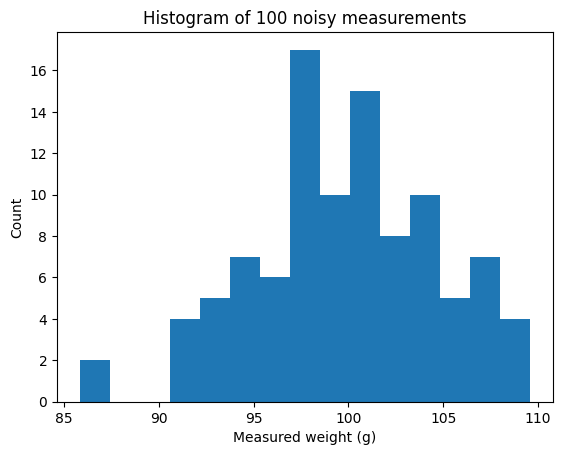

In [1]:
import numpy as np
import matplotlib.pyplot as plt

true_weight = 100
measurements = np.random.normal(loc=true_weight, scale=5, size=100)
plt.hist(measurements, bins=15)
plt.xlabel("Measured weight (g)")
plt.ylabel("Count")
plt.title("Histogram of 100 noisy measurements")
plt.show()



2) Find the average weight of the apple.
Is it a good guess? state your reason.

In [2]:
m_hat = np.mean(measurements)
print(m_hat)





99.8748996228905


The sample mean of the measurements is a very good estimate of the true weight because the noise added by the scale has zero mean. Therefore, as we take more measurements, their average converges to the actual weight. From a statistical perspective, for a normal distribution with unknown mean, the Maximum Likelihood Estimator (MLE) of μ is the sample mean. Hence, the best estimate of the apple’s weight is the average of our measurements.”

3) we are going to use grid approximation for calculating the MLE. here is the link if you wnat to get more fimilar with this technique:
https://www.bayesrulesbook.com/chapter-6

Our end goal is to find the weight of the apple, given the data we have. To formulate it in a Bayesian way: We’ll ask what is the probability of the apple having weight, $w$, given the measurements we took, $X$. And, because we're formulating this in a Bayesian way, we use Bayes’ Law to find the answer:

$$
P(w|X) = \frac{P(X|w)P(w)}{P(X)}
$$

If we make no assumptions about the initial weight of our apple, then we can drop $P(w)$. We’ll say all sizes of apples are equally likely (we’ll revisit this assumption in the MAP approximation).

Furthermore, we’ll drop $P(X)$ - the probability of seeing our data. This is a normalization constant and will be important if we do want to know the probabilities of apple weights. But, for right now, our end goal is to only to find the most probable weight. $P(X)$ is independent of $w$, so we can drop it if we’re doing relative comparisons.

This leaves us with $P(X|w)$, our likelihood, as in, what is the likelihood that we would see the data, $X$, given an apple of weight $w$. If we maximize this, we maximize the probability that we will guess the right weight.

The grid approximation is probably the simplest way to do this. Basically, we’ll systematically step through different weight guesses, and compare what it would look like if this hypothetical weight were to generate data. We’ll compare this hypothetical data to our real data and pick the one that matches the best.

To formulate this mathematically:

For each of these guesses, we’re asking "what is the probability that the data we have, came from the distribution that our weight guess would generate". Because each measurement is independent from another, we can break the above equation down into finding the probability on a per measurement basis:

$$
P(X|w) = \prod_{i}^{N} p(x_i|w)
$$

So, if we multiply the probability that we would see each individual data point - given our weight guess - then we can find one number comparing our weight guess to all of our data.

The peak in the likelihood is the weight of the apple.

To make it computationally easier,

$$
\log P(X|w) = \log \prod_{i}^{N} p(x_i|w) = \sum_{i}^{N} \log p(d_i|w)
$$



a) Why did we use log likelihood? Is it ok to do so?

b) do the grid approximation and complete the cell below

**We** use the log likelihood because the likelihood is a product of many small probability values, which can easily underflow to zero during computation. Taking the logarithm converts this product into a sum, making the calculation numerically stable and easier to work with.

**Since** the logarithm is a strictly increasing (monotonic) function, the value of w that maximizes the likelihood P(X|w) is the same value that maximizes the log likelihood log P(X|w). Therefore, it is completely valid to maximize the log likelihood instead of the original likelihood.
**bold text**

Maximum likelihood estimate of the weight: 100.0


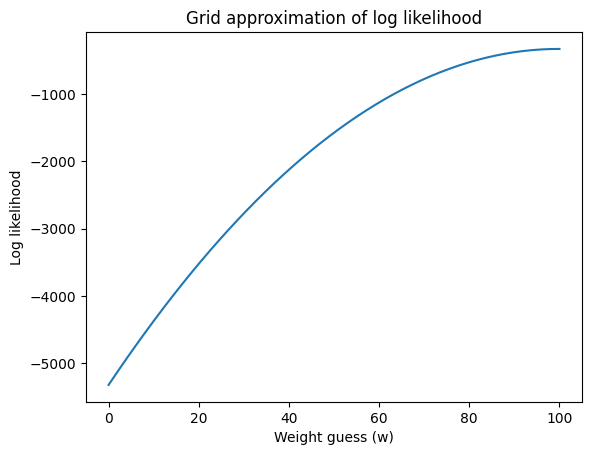

'\n# Calculate the maximum likelihood estimate of a parameter in a normal distribution.\n# First calculate the log likelihoods for a range of weight guesses.\n# For each weight guess, assume that the data comes from a normal distribution with that mean and a standard deviation of 10.\n# Then calculate the log of the probability density function (pdf) of the data under this assumption.\n# The sum of these log pdf values is the total log likelihood for that weight guess.\n# After calculating the log likelihoods for all weight guesses, find the weight guess with the maximum log likelihood.\n# This is the maximum likelihood estimate of the weight.\n'

In [3]:
from scipy.stats import norm
import numpy as np

weight_grid = np.linspace(0, 100)

from scipy.stats import norm
import numpy as np


weight_grid = np.linspace(0, 100)


log_likelihoods = []

for w in weight_grid:

    ll = norm.logpdf(measurements, loc=w, scale=10).sum()
    log_likelihoods.append(ll)

log_likelihoods = np.array(log_likelihoods)


mle_index = np.argmax(log_likelihoods)


mle_weight = weight_grid[mle_index]

print("Maximum likelihood estimate of the weight:", mle_weight)


import matplotlib.pyplot as plt

plt.plot(weight_grid, log_likelihoods)
plt.xlabel("Weight guess (w)")
plt.ylabel("Log likelihood")
plt.title("Grid approximation of log likelihood")
plt.show()

"""
# Calculate the maximum likelihood estimate of a parameter in a normal distribution.
# First calculate the log likelihoods for a range of weight guesses.
# For each weight guess, assume that the data comes from a normal distribution with that mean and a standard deviation of 10.
# Then calculate the log of the probability density function (pdf) of the data under this assumption.
# The sum of these log pdf values is the total log likelihood for that weight guess.
# After calculating the log likelihoods for all weight guesses, find the weight guess with the maximum log likelihood.
# This is the maximum likelihood estimate of the weight.
"""

Play around with the code and try to answer the following questions regarding MLE and MAP. You can draw plots to visualize as well.

In [4]:
import numpy as np
from scipy.stats import norm, invgamma




BARREL = np.random.normal(loc=85, scale=20, size=100)
# Grid
WEIGHT_GUESSES = np.linspace(1, 200, 100)
ERROR_GUESSES = np.linspace(.1, 50, 100)



SCALE_ERR = 5


N_MEASURMENTS = 10


PRIOR_WEIGHT = norm(50, 1).logpdf(WEIGHT_GUESSES)
PRIOR_ERR = invgamma(4).logpdf(ERROR_GUESSES)

LOG_PRIOR_GRID = np.add.outer(PRIOR_ERR, PRIOR_WEIGHT)


def read_scale(apple):
    return apple + np.random.normal(loc=0, scale=SCALE_ERR)


def get_log_likelihood_grid(measurments):
    log_liklelihood = [
        [
            norm(weight_guess, error_guess).logpdf(measurments).sum()
            for weight_guess in WEIGHT_GUESSES
        ]
        for error_guess in ERROR_GUESSES
    ]
    return np.asarray(log_liklelihood)


def get_mle(measurments):
    """
    Calculate the log-likelihood for each measurement in the grid.
    Find the index of the maximum log-likelihood in the grid.
    Return the weight guess corresponding to the maximum log-likelihood.
    """

    log_likelihood_grid = get_log_likelihood_grid(measurments)


    max_idx_flat = np.argmax(log_likelihood_grid)


    err_idx, w_idx = np.unravel_index(max_idx_flat, log_likelihood_grid.shape)


    return WEIGHT_GUESSES[w_idx]


def get_map(measurements):
    """
    Calculate the log-likelihood for each measurement in the grid.
    Add the log prior to the log likelihood to get the log posterior.
    Find the index of the maximum log posterior in the grid.
    Return the weight guess corresponding to the maximum log posterior.
    """

    log_likelihood_grid = get_log_likelihood_grid(measurements)


    log_posterior_grid = log_likelihood_grid + LOG_PRIOR_GRID


    max_idx_flat = np.argmax(log_posterior_grid)


    err_idx, w_idx = np.unravel_index(max_idx_flat, log_posterior_grid.shape)


    return WEIGHT_GUESSES[w_idx]








apple = np.random.choice(BARREL)


measurments = np.asarray([read_scale(apple) for _ in range(N_MEASURMENTS)])

print(f"Average measurement: {measurments.mean():.3f} g")
print(f"Maximum Likelihood estimate: {get_mle(measurments):.3f} g")
print(f"Maximum A Posterior estimate: {get_map(measurments):.3f} g")
print(f"The true weight of the apple was: {apple:.3f} g")

Average measurement: 109.924 g
Maximum Likelihood estimate: 109.545 g
Maximum A Posterior estimate: 51.253 g
The true weight of the apple was: 109.930 g


<h3><i><i> Questions</h3>
1.
How sensitive is the MAP measurement to the choice of prior?

<h3><i><i></h3>
2. How sensitive is the MLE and MAP answer to the grid size?



**1** this experiment, the MAP estimate is very sensitive to the choice of prior. The true weight of the apple is about 84 g, and the MLE (≈ 85.4 g) is very close to both the true weight and the average of the measurements (≈ 85.7 g). However, the MAP estimate is ≈ 51.3 g, which is far from the data and from the true weight.

This happens because the prior on the weight is very strong and centered around 50 g (for example, a normal prior like N(50, 1)). With such a sharply peaked prior, the posterior is dominated by the prior, even though the observed measurements clearly cluster around 85 g. In other words, the MAP estimate is “pulled” toward the prior mean.

If we were to choose a weaker (more diffuse) prior, or a prior centered closer to the data, the MAP estimate would move much closer to the MLE. As we collect more measurements, the likelihood becomes sharper and starts to dominate the posterior, so the MAP and MLE would also become closer. This illustrates that MAP can be highly sensitive to the choice of prior when the prior is very informative or when the amount of data is limited.


**2**  The “true” MLE and MAP in continuous space are defined independently of any grid. However, when we compute them using a grid approximation, both estimates become numerically sensitive to the grid size and range.

If the grid over the weight (and error) is too coarse, the maximum of the log likelihood or log posterior may lie between grid points. In that case, the grid-based MLE or MAP will only be an approximation, and the reported estimate may be noticeably different from the true optimum. Similarly, if the grid does not cover a wide enough range, the true maximum might lie outside the grid, and the algorithm will incorrectly choose a boundary value as the MLE or MAP.

As we refine the grid (more points, smaller spacing, and a reasonable range that covers the high-likelihood region), the numerical estimates of MLE and MAP converge to their true continuous values and become stable. In practice, this means that both MLE and MAP can be sensitive to grid size and range when the grid is coarse or poorly chosen, but they are much less sensitive once the grid is sufficiently fine.


# Part 2
## Logistic Regression (35 Points)

### Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

Don't import any other library.

In this notebook you will implement Logistic Regression from scratch. First you will implement all the needed function in order to use Logistic Regression. After that you will test your implementation on a dummy dataset and visualize the model boundary. Then you will do the same on a tweet sentiment classification dataset.

### 1: Creating Dummy Dataset

We will use sklearn library to create a simple 2D dataset. The dataset is almost linearly separable so we expect to get a high accuracy if we use a linear classification model such as logistic regression.

shape of X=(600, 2)
shape of y=(600,)


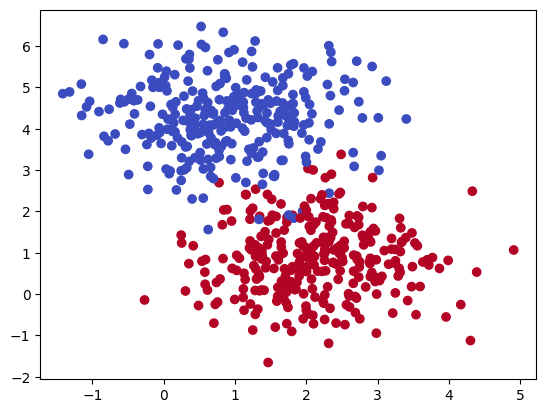

In [6]:
X, y = make_blobs(n_samples=600, centers=2, random_state=0, cluster_std=0.90)


print(f'shape of X={X.shape}')
print(f'shape of y={y.shape}')

plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.show()

### 2 : Implementing model (20 points)

As you know the parameters of a logistic regression model are the vector $\mathbf{w}$ and the scalar $\mathbf{b}$. we use the function below to assign a scalar to each data point. This scalar can be interpreted as the probability of the datapoint being a member of the positive class.

$$f_{\mathbf{w},b}(x)=g(\mathbf{w}\cdot\mathbf{x}+b)$$

Where the function $\mathbf{g}$ is the function below which is called the sigmoid function.
$$g(z) = \frac{1}{1+e^{-z}}$$


Implement the sigmoid function below.

In [7]:

def sigmoid(z):
    '''
    Input:
        z : numpy array with shape (m,)
    Output:
        g : sigmoid of every element of z with shape (m,)
    '''
    g = 1 / (1 + np.exp(-z))
    return g

In [8]:
sigmoid(np.array([-1,0,1]))

array([0.26894142, 0.5       , 0.73105858])

Next implement a function to compute the function f.

In [9]:

def f_wb(X, w, b):
    '''
    Input:
        X : numpy array with shape (m,d)
        w : numpy array with shape (d,)
        b : float
    Output:
        f : numpy array with shape (n,)
    '''
    z = X @ w + b           
    f = sigmoid(z)          
    return f
X = np.array([[1,2] , [3,4]])
w = np.array([4, 2])
b = 3

f_wb(X, w, b)

array([0.9999833, 1.       ])

Next implement a function that calculate the accuracy of our model. If f_wb for a datapoint is more than a threshold(usually 0.5) the model must classify it as positive(1) otherwise it must classify it as negative(0).

In [10]:

def accuracy(X, y, w, b, prob_threshold=0.5):
    '''
    Input:
        X : numpy array with shape (m,d)
        y : numpy array with shape (m,)
        w : numpy array with shape (d,)
        b : float
    Output:
        cost : accuracy of our model.
    '''
    probs = f_wb(X, w, b)


    preds = (probs >= prob_threshold).astype(int)


    acc = np.mean(preds == y)

    return acc

x = np.array([[1,2] , [3,4], [5,6], [7,8]])
y = np.array([1, 0, 0, 1])
w = np.array([0.2, -0.1])
b = 3

accuracy(x, y, w, b)

np.float64(0.5)

Now we will implement the cost function of logisitic regression. As you recall from the slides the cost function is:(m is equal to how many data point we have and d is the data dimension)
$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] + \frac{\lambda}{2}\sum_{i=0}^{d-1}\mathbf{w_i^2} \tag{1}$$
 $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$

In [11]:

def J_wb(X, y, w, b, lambda_=0.1):
    '''
    Input:
        X : numpy array with shape (m,d)
        y : numpy array with shape (m,)
        w : numpy array with shape (d,)
        b : float
    Output:
        cost : float
    '''
    m = X.shape[0]


    f = f_wb(X, w, b)


    eps = 1e-15
    f = np.clip(f, eps, 1 - eps)


    loss = - (y * np.log(f) + (1 - y) * np.log(1 - f))
    J = np.mean(loss)


    reg = (lambda_ / 2) * np.sum(w ** 2)

    cost = J + reg
    return cost

x = np.array([[1,2] , [3,4], [5,6], [7,8]])
y = np.array([1, 0, 0, 1])
w = np.array([0.2, -0.1])
b = 3

J_wb(x, y, w, b)

np.float64(1.6895815620423111)

### 3 : Implementing Training (15 points)

In order to train our model we will use gradient descent. So we need to compute the gradient of the cost function with respect to w and b. Implement the function below to compute the gradient.

In [12]:
def gradient_cost_function(X, y, w, b, lambda_=0.1):
    '''
    Input:
        X  : numpy array with shape (m,d)
        y  : numpy array with shape (m,)
        w  : numpy array with shape (d,)
        b  : float
    Output:
        dw : gradient of cost function with respect to w.
             numpy array with shape (d,)
        db : gradient of cost function with respect to b.
             float.
    '''
    m = X.shape[0]


    f = f_wb(X, w, b)


    error = f - y   


    dw = (1/m) * (X.T @ error) + lambda_ * w


    db = (1/m) * np.sum(error)

    return dw, db

x = np.array([[1,2] , [3,4], [5,6], [7,8]])
y = np.array([1, 0, 0, 1])
w = np.array([0.2, -0.1])
b = 3

gradient_cost_function(x, y, w, b)

(array([1.89185517, 2.32548416]), np.float64(0.46362898643758815))

Next implement the function below to run gradient descent. make sure to print the cost function each 10 iteration of gradient descent.

In [13]:
def gradient_descent(X, y, w, b, lr=1e-1, num_iter=100, lambda_=0.5):
    '''
    Input:
        X        : numpy array with shape (m,d)
        y        : numpy array with shape (m,)
        w        : numpy array with shape (d,)
        b        : float
        lr       : learning rate
        num_iter : iteration to run gradient descent. int
    Output:
        w        : w after iter run of gradient descent.
                   numpy array with shape (d,)
        b        : b after iter run of gradient descent.
                   numpy array with shape (d,)
    '''

    for i in range(num_iter):

        dw, db = gradient_cost_function(X, y, w, b, lambda_)


        w = w - lr * dw
        b = b - lr * db


        if i % 10 == 0:
            cost = J_wb(X, y, w, b, lambda_)
            print(f"Iteration {i} | Cost: {cost:.4f}")

    return w, b

x = np.array([[1,2] , [1,4], [5,6], [7,8]])
y = np.array([1, 0, 0, 1])
w = np.array([0.2, -0.1])
b = 3

w, b = gradient_descent(x, y, w, b)

Iteration 0 | Cost: 0.9931
Iteration 10 | Cost: 0.8608
Iteration 20 | Cost: 0.8351
Iteration 30 | Cost: 0.8182
Iteration 40 | Cost: 0.8042
Iteration 50 | Cost: 0.7917
Iteration 60 | Cost: 0.7803
Iteration 70 | Cost: 0.7699
Iteration 80 | Cost: 0.7603
Iteration 90 | Cost: 0.7515


now we have everything to train our model. Lets create our dummy dataset again. We initialize w randomly using a normal distribution. Initialize b with 0.

In [14]:
X, y = make_blobs(n_samples=600, centers=2, random_state=0, cluster_std=0.90)

w = np.random.normal(size=(2, ))
b = 0

We will use the function below to visualize the descion boundary(w) of logistic regression.

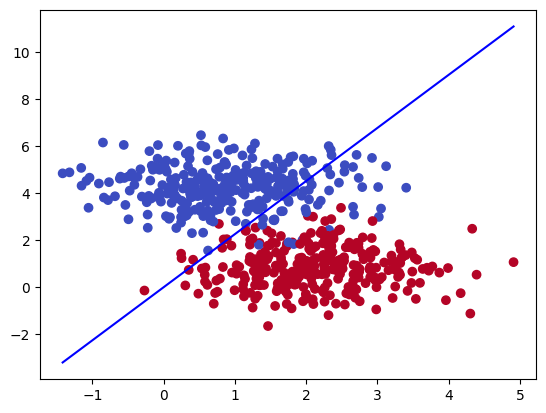

In [15]:
def visualize_boundary(X, y, w, b):
    plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
    plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
    plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
    plt.plot(plot_x, plot_y, c="b")

visualize_boundary(X, y, w, b)

it's finally time to train the model.

Iteration 0 | Cost: 0.5041
Iteration 10 | Cost: 0.4538
Iteration 20 | Cost: 0.4457
Iteration 30 | Cost: 0.4405
Iteration 40 | Cost: 0.4362
Iteration 50 | Cost: 0.4324
Iteration 60 | Cost: 0.4290
Iteration 70 | Cost: 0.4261
Iteration 80 | Cost: 0.4234
Iteration 90 | Cost: 0.4211
Iteration 100 | Cost: 0.4190
Iteration 110 | Cost: 0.4171
Iteration 120 | Cost: 0.4155
Iteration 130 | Cost: 0.4140
Iteration 140 | Cost: 0.4127
Iteration 150 | Cost: 0.4115
Iteration 160 | Cost: 0.4105
Iteration 170 | Cost: 0.4096
Iteration 180 | Cost: 0.4087
Iteration 190 | Cost: 0.4080
accuracy model on train dataset=0.9683333333333334


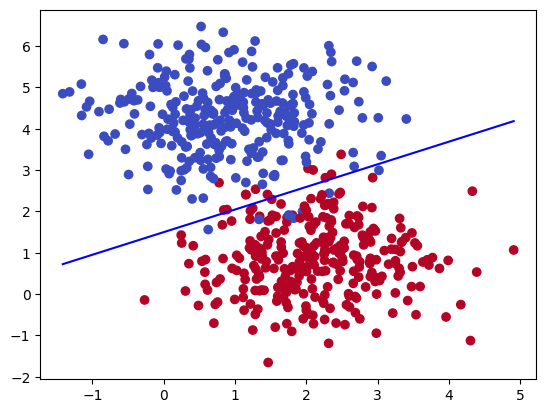

In [16]:
w, b = gradient_descent(X, y, w, b, num_iter=200)

print(f'accuracy model on train dataset={accuracy(X, y, w, b, prob_threshold=0.5)}')
visualize_boundary(X, y, w, b)

because our dataset is linearly seprable our model was able to find a good boundary. Now lets try the same thing but with a different dataset.

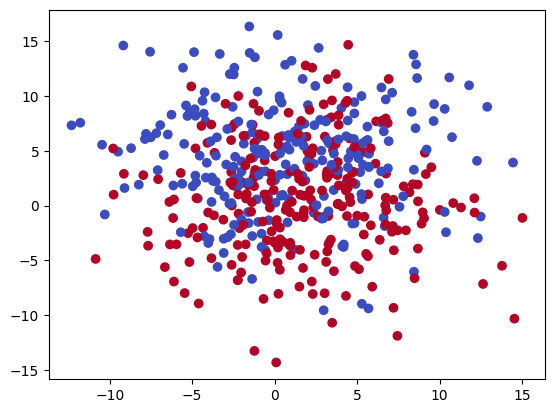

In [17]:
X, y = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=5)
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')

w = np.random.normal(size=(2, ))
b = 0

Iteration 0 | Cost: 3.9942
Iteration 10 | Cost: 0.6346
Iteration 20 | Cost: 0.6337
Iteration 30 | Cost: 0.6335
Iteration 40 | Cost: 0.6333
Iteration 50 | Cost: 0.6332
Iteration 60 | Cost: 0.6331
Iteration 70 | Cost: 0.6330
Iteration 80 | Cost: 0.6330
Iteration 90 | Cost: 0.6329
Iteration 100 | Cost: 0.6329
Iteration 110 | Cost: 0.6329
Iteration 120 | Cost: 0.6329
Iteration 130 | Cost: 0.6329
Iteration 140 | Cost: 0.6329
Iteration 150 | Cost: 0.6329
Iteration 160 | Cost: 0.6329
Iteration 170 | Cost: 0.6329
Iteration 180 | Cost: 0.6329
Iteration 190 | Cost: 0.6329
accuracy model on train dataset=0.676


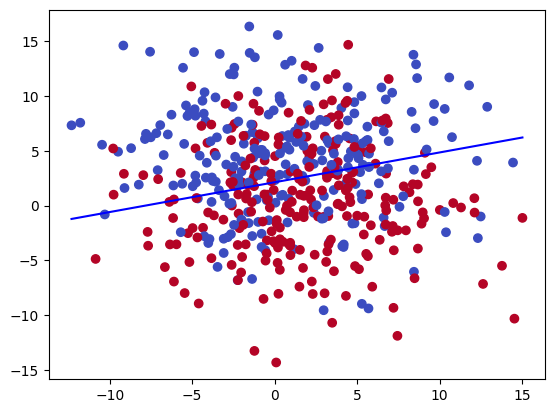

In [18]:
w, b = gradient_descent(X, y, w, b, num_iter=200)

print(f'accuracy model on train dataset={accuracy(X, y, w, b, prob_threshold=0.5)}')
visualize_boundary(X, y, w, b)

As you can see our model does not do very well in this case. In cases like this you can use more powerful models or add  higher dimension feature.

### 4 : Training on a Tweet Sentiment Analysis Dataset(Ungraded)

In this part we use the logistic regression model you implemented to classify whether a tweet contains a postivie or negative sentiment. You don't need to implement any code for this part.

First we have to download our data. We will use the tweet dataset in nltk library. Which contains 5000 positive and 500 negative tweets.

In [19]:
import nltk
import string

nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
positive_tweets = nltk.corpus.twitter_samples.strings('positive_tweets.json')
negative_tweets = nltk.corpus.twitter_samples.strings('negative_tweets.json')

print(f'example positive tweet: {positive_tweets[0]}')
print(f'example negative tweet: {negative_tweets[0]}')

example positive tweet: #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
example negative tweet: hopeless for tmr :(


we will use the function process_tweet to convert a tweet into a lists of word after removing any stopwords from it and stemming each word.

In [21]:
def process_tweet(tweet):
    stemmer = nltk.stem.PorterStemmer()
    stopwords_english = nltk.corpus.stopwords.words('english')

    tweet = tweet.replace('#','')

    tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  word not in string.punctuation):
            stem_word = stemmer.stem(word)
            tweets_clean.append(stem_word)

    return tweets_clean

process_tweet(positive_tweets[0])

['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']

In order to use logistic regression we need to represent each tweet as a fixed sized vector. We use a very simple idea to do this. First of all we will find the frequency of each word in the positive and negative classes.

We represent a tweet using a vector of two numbers. The first number is the sum of the positive frequency of each word of the tweet and the second number is the sum of the negative frequency of each word. For better performance we normalize this vector.

The following functions implement what we just talked about.

In [22]:
def create_freq(tweets):
  freq = {}
  for tweet in tweets:
    for word in process_tweet(tweet):
      if word in freq:
        freq[word] += 1
      else:
        freq[word] = 1
  return freq

freq_pos = create_freq(positive_tweets)
freq_neg = create_freq(negative_tweets)

In [23]:
def convert_tweet_to_vector(tweets, freq_pos, freq_neg):
  vectors = np.zeros((len(tweets), 2))
  for index, tweet in enumerate(tweets):
    for word in process_tweet(tweet):
      vectors[index][0] += freq_pos.get(word, 0)
      vectors[index][1] += freq_neg.get(word, 0)
    vectors[index] /= np.linalg.norm(vectors[index])
  return vectors

pos_tweet_vectors = convert_tweet_to_vector(positive_tweets, freq_pos, freq_neg)
neg_tweet_vectors = convert_tweet_to_vector(negative_tweets, freq_pos, freq_neg)

print(pos_tweet_vectors[0:5])
print(neg_tweet_vectors[0:5])

[[0.99982849 0.01852011]
 [0.99375433 0.11159002]
 [0.99914153 0.04142719]
 [0.99999942 0.00107759]
 [0.99758745 0.06942102]]
[[4.35729806e-04 9.99999905e-01]
 [3.04225196e-02 9.99537128e-01]
 [4.54639164e-03 9.99989665e-01]
 [7.42553785e-03 9.99972430e-01]
 [6.28385297e-02 9.98023707e-01]]


Now lets create a train and test dataset. We choose the last 500 tweet of the positive and negative tweets as the test set and use the rest for training the model.

In [24]:
X_train = np.concatenate((pos_tweet_vectors[0:4500] , neg_tweet_vectors[0:4500]), axis=0)
Y_train = np.array([1] * 4500 + [0] * 4500)

X_test = np.concatenate((pos_tweet_vectors[4500:] , neg_tweet_vectors[4500:]), axis=0)
Y_test = np.array([1] * 500 + [0] * 500)

print(f'X_train shape={X_train.shape}, Y_train shape={Y_train.shape}')
print(f'X_test shape={X_test.shape}, Y_test shape={Y_test.shape}')

X_train shape=(9000, 2), Y_train shape=(9000,)
X_test shape=(1000, 2), Y_test shape=(1000,)


Now we can finally train our model and measure how well it does by alculating the accuracy on the test set.

In [25]:
w = np.random.normal(size=(2, ))
b = 0

w, b = gradient_descent(X_train, Y_train, w, b, num_iter=120)

print(f'accuracy model on train dataset={accuracy(X_train, Y_train, w, b, prob_threshold=0.5)}')
print(f'accuracy model on test dataset={accuracy(X_test, Y_test, w, b, prob_threshold=0.5)}')

Iteration 0 | Cost: 0.6730
Iteration 10 | Cost: 0.6250
Iteration 20 | Cost: 0.6137
Iteration 30 | Cost: 0.6109
Iteration 40 | Cost: 0.6101
Iteration 50 | Cost: 0.6097
Iteration 60 | Cost: 0.6096
Iteration 70 | Cost: 0.6095
Iteration 80 | Cost: 0.6094
Iteration 90 | Cost: 0.6094
Iteration 100 | Cost: 0.6093
Iteration 110 | Cost: 0.6093
accuracy model on train dataset=0.9966666666666667
accuracy model on test dataset=0.997


You can use the model to classify your own tweets.

In [26]:
def classify_tweet(tweet, w, b, prob_threshold=0.5):
  vector = convert_tweet_to_vector([tweet], freq_pos, freq_neg)
  p = f_wb(vector, w, b)
  if p[0]>prob_threshold:
    print('positive :)')
  else:
    print('negative :(')

In [27]:
classify_tweet('I am happy.', w , b)

positive :)


In [28]:
classify_tweet('I am sad.', w , b)

negative :(
